### You can explore also the following tutorials:
### - https://qiskit-community.github.io/qiskit-optimization/tutorials/06_examples_max_cut_and_tsp.html
### - https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm

In [2]:
import numpy as np
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import Sampler
from qiskit_algorithms import QAOA, NumPyMinimumEigensolver
import networkx as nx
from qiskit_optimization.applications import Maxcut
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.quantum_info import SparsePauliOp
from qiskit_optimization import QuadraticProgram
from qiskit.visualization import plot_distribution

### The goal of this exercise is to use quantum computer for finding optimal solution for combinatorial problems.\
### We'll use QAOA algorithm to simple MAXCUT problem, but this approach can be easily extrapolated to other combinatorial problems.

# Let's define our graph:

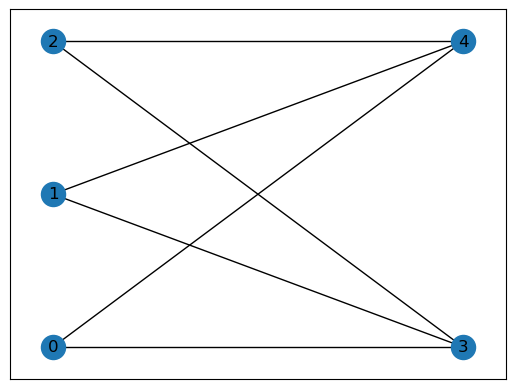

In [3]:
G = nx.Graph()
G.add_edges_from([[0,3],[0,4],[1,3],[1,4],[2,3],[2,4]])
nx.draw_networkx(G, pos=nx.bipartite_layout(G, [0,1,2]))

## Now, let's create operator defining Maxcut problem for this graph:

In [4]:
operator = SparsePauliOp.from_list(
    [("IZIIZ", 0.5), 
     ("ZIIIZ", 0.5),
     ("IZIZI", 0.5), 
     ("ZIIZI", 0.5),
     ("IZZII", 0.5),
     ("ZIZII", 0.5)]
)

## Now let's solve the problem classically:

In [5]:
problem = QuadraticProgram()
offset = -3
problem.from_ising(operator, offset)
print(problem.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Minimize
 obj: [ - 4 x0^2 + 4 x0*x3 + 4 x0*x4 - 4 x1^2 + 4 x1*x3 + 4 x1*x4 - 4 x2^2
      + 4 x2*x3 + 4 x2*x4 - 6 x3^2 - 6 x4^2 ]/2
Subject To

Bounds
 0 <= x0 <= 1
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1

Binaries
 x0 x1 x2 x3 x4
End



In [6]:
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
classical_result = exact.solve(problem)
print(classical_result.prettyprint())
print(classical_result.x)

objective function value: -6.0
variable values: x0=0.0, x1=0.0, x2=0.0, x3=1.0, x4=1.0
status: SUCCESS
[0. 0. 0. 1. 1.]


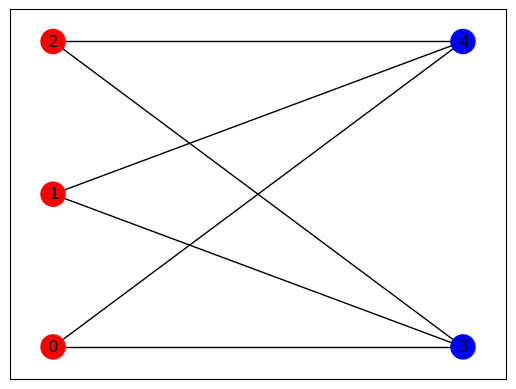

In [7]:
colors = ['r' if classical_result.x[node] == 0 else 'b' for node in G]
nx.draw_networkx(G,node_color = colors, pos=nx.bipartite_layout(G, [0,1,2]))

## And now, we solve it using QAOA algorithm:

In [8]:
sampler = Sampler()
optimizer = SPSA()
qaoa = QAOA(sampler, optimizer, reps=3)
qaoa_result = qaoa.compute_minimum_eigenvalue(operator)
print(qaoa_result)

{   'aux_operators_evaluated': None,
    'best_measurement': {   'bitstring': '00111',
                            'probability': 0.3582785954788206,
                            'state': 7,
                            'value': (-3+0j)},
    'cost_function_evals': 200,
    'eigenstate': {0: 0.010762596065171, 1: 0.013616373529269, 2: 0.013616373529269, 3: 0.053515527186779, 4: 0.013616373529269, 5: 0.053515527186779, 6: 0.053515527186779, 7: 0.184321784378485, 8: 0.023043877154853, 9: 0.009572027183082, 10: 0.009572027183082, 11: 0.009572027183082, 12: 0.009572027183082, 13: 0.009572027183082, 14: 0.009572027183082, 15: 0.023043877154853, 16: 0.023043877154853, 17: 0.009572027183082, 18: 0.009572027183082, 19: 0.009572027183082, 20: 0.009572027183082, 21: 0.009572027183082, 22: 0.009572027183082, 23: 0.023043877154853, 24: 0.184321784378485, 25: 0.053515527186779, 26: 0.053515527186779, 27: 0.013616373529269, 28: 0.053515527186779, 29: 0.013616373529269, 30: 0.013616373529269, 31: 0.010

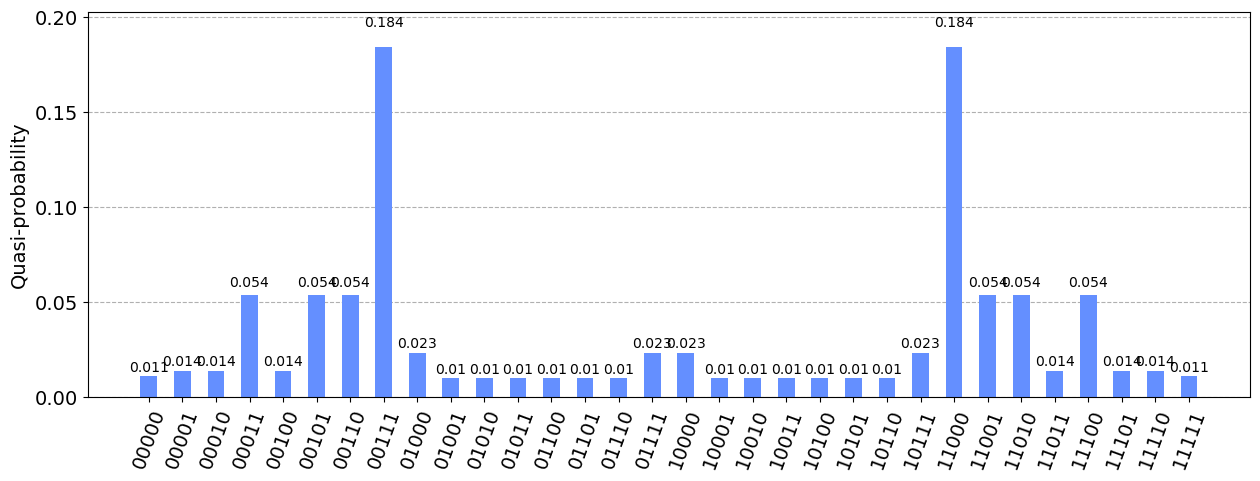

In [9]:
plot_distribution(qaoa_result.eigenstate.binary_probabilities(), figsize=(15, 5))

## Exercise - Solve Maxcut problem using QAOA algorithm for the following graph:
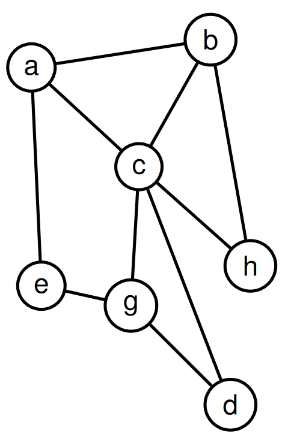